## Machine Learning using Python
## Exam – Paper 2

### unsupervised Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("credit_card.csv")

In [4]:
df.head().T

,0,1,2,3,4
CUST_ID,C10001,C10002,C10003,C10004,C10005
BALANCE,40.900749,3202.467416,2495.148862,1666.670542,817.714335
BALANCE_FREQUENCY,0.818182,0.909091,1.0,0.636364,1.0
PURCHASES,95.4,0.0,773.17,1499.0,16.0
ONEOFF_PURCHASES,0.0,0.0,773.17,1499.0,16.0
INSTALLMENTS_PURCHASES,95.4,0.0,0.0,0.0,0.0
CASH_ADVANCE,0.0,6442.945483,0.0,205.788017,0.0
PURCHASES_FREQUENCY,0.166667,0.0,1.0,0.083333,0.083333
ONEOFF_PURCHASES_FREQUENCY,0.0,0.0,1.0,0.083333,0.083333
PURCHASES_INSTALLMENTS_FREQUENCY,0.083333,0.0,0.0,0.0,0.0


In [5]:
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

In [6]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [7]:
df.describe(include='all')

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


In [8]:
df.shape

(8950, 18)

In [9]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

# Perform the following tasks

### Q1. What does the primary analysis of several categorical
### features reveal?

In [10]:
df.describe(exclude=[np.number])

,CUST_ID
count,8950
unique,8950
top,C10001
freq,1


In [ ]:
#the only categorical value in the dataset is customerid

### Q2. Perform the following Exploratory Data Analysis tasks:

### a.missing values analysis

<AxesSubplot:>

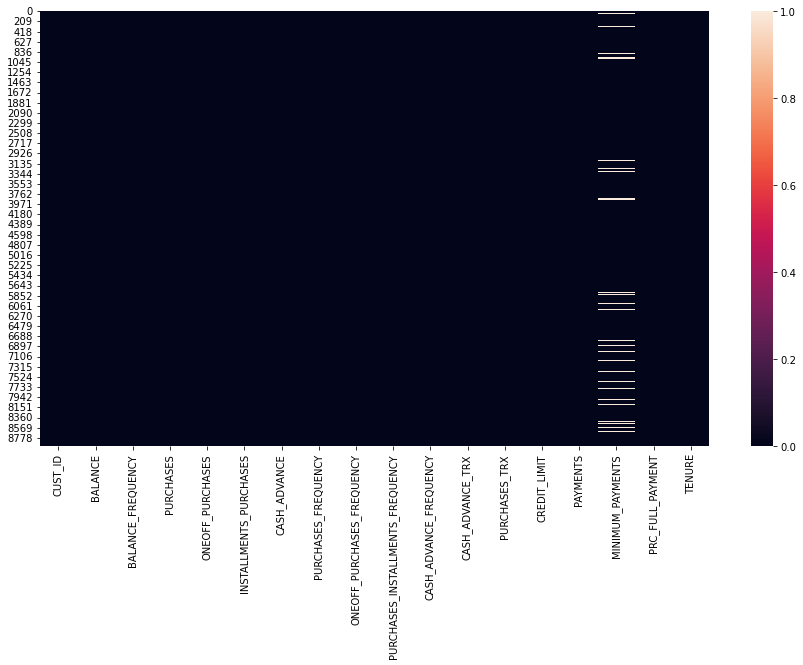

In [11]:
plt.subplots(figsize=(15,8))
sns.heatmap(df.isnull())

In [12]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [13]:
df['CREDIT_LIMIT'].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

<AxesSubplot:xlabel='CREDIT_LIMIT', ylabel='Density'>

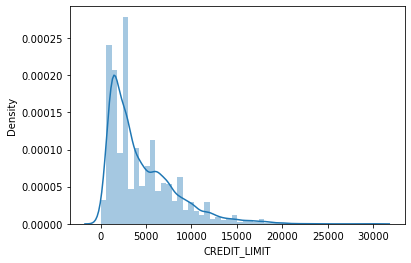

In [14]:
sns.distplot(df['CREDIT_LIMIT'])

In [15]:
df['CREDIT_LIMIT']=df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].mean())

In [16]:
df['MINIMUM_PAYMENTS'].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

<AxesSubplot:xlabel='MINIMUM_PAYMENTS', ylabel='Density'>

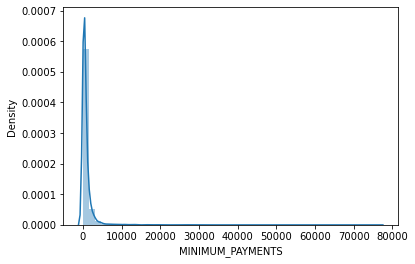

In [17]:
sns.distplot(df['MINIMUM_PAYMENTS'])

In [18]:
df['MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].mean())

### b. Outlier Treatment using the Z-score method

BALANCE                          AxesSubplot(0.125,0.749828;0.168478x0.130172)
BALANCE_FREQUENCY             AxesSubplot(0.327174,0.749828;0.168478x0.130172)
PURCHASES                     AxesSubplot(0.529348,0.749828;0.168478x0.130172)
INSTALLMENTS_PURCHASES        AxesSubplot(0.731522,0.749828;0.168478x0.130172)
CASH_ADVANCE                     AxesSubplot(0.125,0.593621;0.168478x0.130172)
PURCHASES_FREQUENCY           AxesSubplot(0.327174,0.593621;0.168478x0.130172)
ONEOFF_PURCHASES_FREQUENCY    AxesSubplot(0.529348,0.593621;0.168478x0.130172)
CASH_ADVANCE_FREQUENCY        AxesSubplot(0.731522,0.593621;0.168478x0.130172)
CASH_ADVANCE_TRX                 AxesSubplot(0.125,0.437414;0.168478x0.130172)
PURCHASES_TRX                 AxesSubplot(0.327174,0.437414;0.168478x0.130172)
CREDIT_LIMIT                  AxesSubplot(0.529348,0.437414;0.168478x0.130172)
PAYMENTS                      AxesSubplot(0.731522,0.437414;0.168478x0.130172)
MINIMUM_PAYMENTS                 AxesSubplot(0.125,0

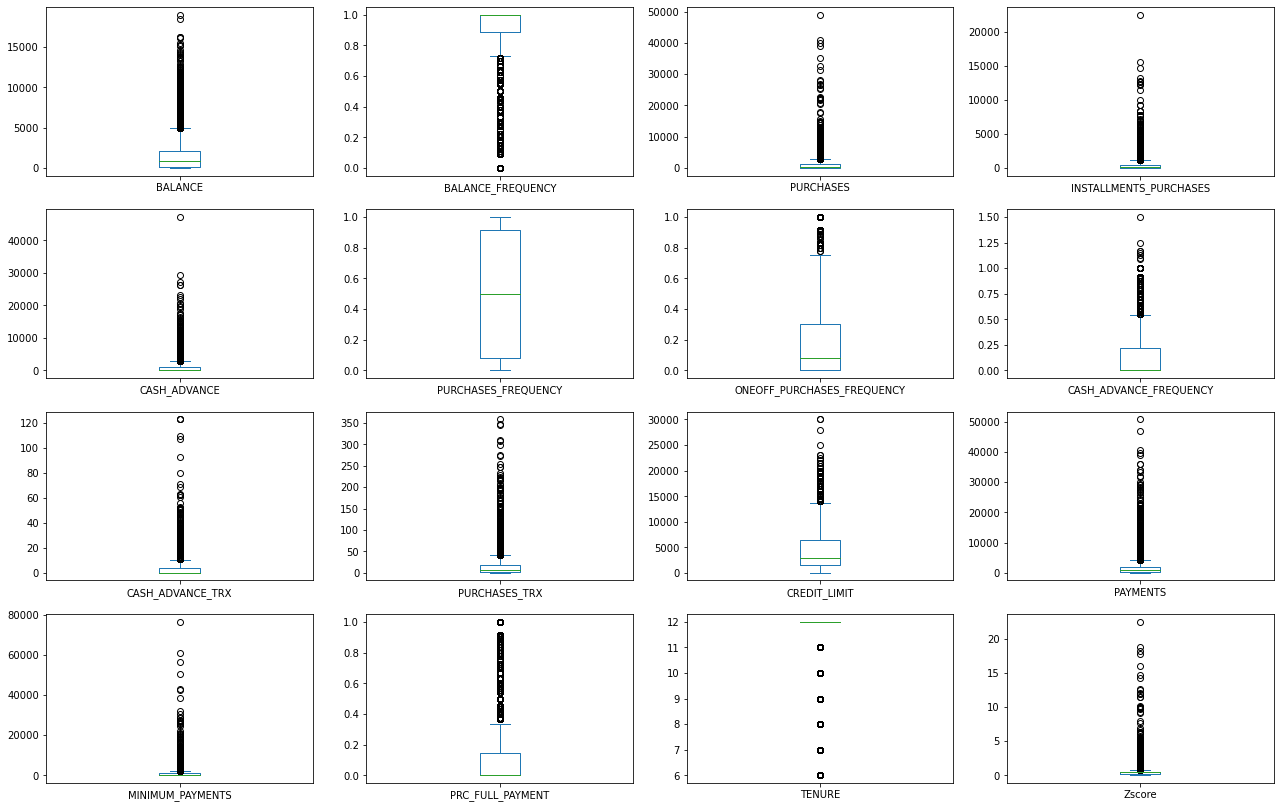

In [52]:
#plotting the outliers
df.plot(subplots=True,layout=(5,4),kind='box',figsize=(22,18))

In [19]:
from scipy.stats import zscore     # To Apply Zscore Treatment

In [20]:
z = np.abs(zscore(df['PURCHASES']))

In [21]:
df['Zscore'] = z
len(df[df['Zscore']>2])

256

In [22]:
print("shape of the dataset",df.shape)

shape of the dataset (8950, 19)


In [23]:
df_z = df[df['Zscore']<3] 
print('shape of the new dataset',df_z.shape  )

shape of the new dataset (8815, 19)


### c. Deal with correlated variables

<AxesSubplot:>

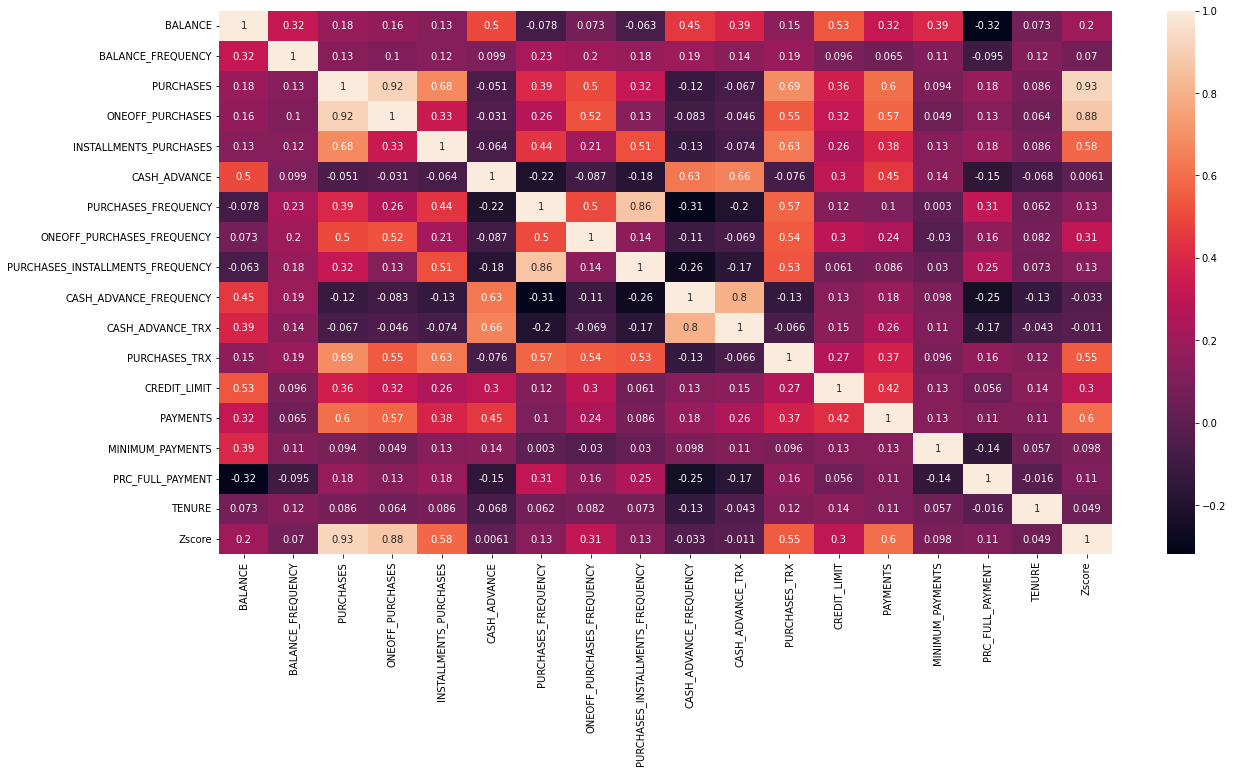

In [24]:
plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [25]:
cor_matrix = df.corr().abs()
print(cor_matrix)

                                   BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388   0.051474   
PURCHASES_FREQUENCY               0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY  0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873   0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555   0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.689561   
CREDIT_LIMIT

In [26]:
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
print(upper_tri)

                                  BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                               NaN           0.322412   0.181261   
BALANCE_FREQUENCY                     NaN                NaN   0.133674   
PURCHASES                             NaN                NaN        NaN   
ONEOFF_PURCHASES                      NaN                NaN        NaN   
INSTALLMENTS_PURCHASES                NaN                NaN        NaN   
CASH_ADVANCE                          NaN                NaN        NaN   
PURCHASES_FREQUENCY                   NaN                NaN        NaN   
ONEOFF_PURCHASES_FREQUENCY            NaN                NaN        NaN   
PURCHASES_INSTALLMENTS_FREQUENCY      NaN                NaN        NaN   
CASH_ADVANCE_FREQUENCY                NaN                NaN        NaN   
CASH_ADVANCE_TRX                      NaN                NaN        NaN   
PURCHASES_TRX                         NaN                NaN        NaN   
CREDIT_LIMIT             

In [27]:
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)]
print();
print(to_drop)


['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'Zscore']


In [28]:
df=df.drop(['ONEOFF_PURCHASES','PURCHASES_INSTALLMENTS_FREQUENCY'],axis=1)

In [29]:
##columns with maximum correlation have been dropped

In [30]:
df.shape

(8950, 17)

### Q3. Perform dimensionality reduction using PCA such that the
### 95% of the variance is explained

In [31]:
df=df.drop('CUST_ID',axis=1)

In [32]:
df.shape

(8950, 16)

In [33]:
X=df.values

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
X_scaled=scaler.transform(X)

In [35]:
X_scaled

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.52555097,
         0.36067954, -0.09329266],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.2342269 ,
         0.36067954, -0.04154515],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.52555097,
         0.36067954, -0.46093326],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ...,  0.32919999,
        -4.12276757, -0.11987157],
       [-0.74517423, -0.18547673, -0.46955188, ...,  0.32919999,
        -4.12276757, -0.04154515],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.52555097,
        -4.12276757, -0.5368674 ]])

In [36]:
from sklearn.decomposition import PCA
Pca_15=PCA(n_components=15,random_state=0)
Pca_15.fit(X_scaled)
Pca_15_x=Pca_15.transform(X_scaled)

In [37]:
print("variance by all the components=",sum(Pca_15.explained_variance_ratio_*100))

variance by all the components= 99.82159897011802


In [38]:
from sklearn.decomposition import PCA
Pca_12=PCA(n_components=12,random_state=0)
Pca_12.fit(X_scaled)
Pca_12_x=Pca_12.transform(X_scaled)
print("variance by all the components=",sum(Pca_12.explained_variance_ratio_*100))

variance by all the components= 95.98225059582177


In [39]:
Pca_12.explained_variance_ratio_*100

array([27.29267296, 20.85484996,  8.53054983,  7.59547664,  6.33006686,
        5.55768179,  5.20450859,  4.1533023 ,  3.80453778,  3.10153465,
        1.89678212,  1.66028711])

In [40]:
#now the dataframe with 12 components contain nearly 95% of variance

Text(0, 0.5, 'Explained_variance')

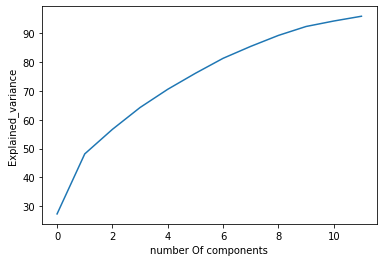

In [45]:
plt.plot(np.cumsum(Pca_12.explained_variance_ratio_*100))
plt.xlabel("number Of components")
plt.ylabel('Explained_variance')

### Q4. Find the optimum value of k for k-means clustering using
### the elbow method. Plot the elbow curve

In [46]:
df1=df

In [47]:
scale=StandardScaler().fit(df1)
df1=scale.transform(df1)
df_scaled=pd.DataFrame(df1)
df_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-0.731989,-0.249434,-0.424900,-0.349079,-0.466786,-0.806490,-0.678661,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068,-0.093293
1,0.786961,0.134325,-0.469552,-0.454576,2.605605,-1.221758,-0.678661,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068,-0.041545
2,0.447135,0.518084,-0.107668,-0.454576,-0.466786,1.269843,2.673451,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068,-0.460933
3,0.049099,-1.016953,0.232058,-0.454576,-0.368653,-1.014125,-0.399319,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,-4.390474e-16,-0.525551,0.36068,-0.316778
4,-0.358775,0.518084,-0.462063,-0.454576,-0.466786,-1.014125,-0.399319,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068,-0.050224


In [48]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state = 42)
    kmeans.fit(df_scaled.iloc[:,3:])
    wcss.append(kmeans.inertia_)


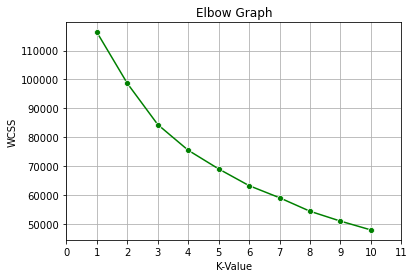

In [49]:
plt.grid()
sns.lineplot(x=range(1,11), y=wcss, color="green",marker='o')
plt.xlabel("K-Value")
plt.xticks(np.arange(11.5))
plt.ylabel("WCSS")
plt.title("Elbow Graph")
plt.show()

In [50]:
## optimal k-value can be considered as 2

### Q5. Find the optimum value of k for k-means clustering using the silhouette score method and specify the number of
### observations in each cluster using a bar plot

In [51]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
n_clusters=[2,3,4,5,6,7,8,9,10]
for k in n_clusters:
          cluster=KMeans(n_clusters=k,random_state=10)
          predict=cluster.fit_predict(df_scaled)
          score=silhouette_score(df_scaled,predict,random_state=10)
          print("(for n_clusters={},silhouette_score  is {})".format(k,score))

(for n_clusters=2,silhouette_score  is 0.37423958198259616)
(for n_clusters=3,silhouette_score  is 0.28541423309962427)
(for n_clusters=4,silhouette_score  is 0.23788986206893079)
(for n_clusters=5,silhouette_score  is 0.19119553098568437)
(for n_clusters=6,silhouette_score  is 0.18342729058204676)
(for n_clusters=7,silhouette_score  is 0.19885313980339747)
(for n_clusters=8,silhouette_score  is 0.20142858933820218)
(for n_clusters=9,silhouette_score  is 0.20171216889759913)
(for n_clusters=10,silhouette_score  is 0.20102201514535653)


In [ ]:
#using silhoutte score methid we can consider 2 as a optimum value for k